In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/credit_fraud.csv')
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


# 데이터 EDA & 전처리

## 기본 정보

In [3]:
df.shape

(150000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [5]:
# 결측치가 있다.
df.isnull().sum()

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address               127
user_agent               113
email_domain              90
phone_number             127
billing_city             116
billing_postal           124
billing_state            113
card_bin                 128
currency                 108
cvv                      123
signature_image          105
transaction_type         116
transaction_env          123
EVENT_TIMESTAMP          112
applicant_name           143
billing_address          134
merchant_id              107
locale                   134
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64

In [6]:
# 결측치의 개수가 적어서 삭제를 진행하기로 한다. - 3천개의 데이터 삭제
df = df.dropna(axis=0)
df.shape

(147000, 26)

In [7]:
# 클래스 불균형 심각
df['EVENT_LABEL'].value_counts()

legit    138996
fraud      8004
Name: EVENT_LABEL, dtype: int64

In [8]:
# 5% 정도가 사기 거래
df['EVENT_LABEL'].value_counts()[1] / len(df) * 100

5.444897959183673

In [9]:
df.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000
mean,4645.817224,2521.343592,54.208837,4702.388673,50179.458129,41834.312320,49.858524,7996.856367
std,1153.792072,604.680167,10.068128,1188.255402,28389.219411,10082.094148,29.208844,4047.922681
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25298.000000,35386.000000,24.000000,4485.000000
50%,4668.000000,2543.000000,55.000000,4729.000000,50072.000000,42086.000000,50.000000,7999.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74346.000000,47373.000000,75.000000,11495.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [10]:
# user_agent 특징에서 브라우저 name만 선택해서 진행
df['user_agent'] = df['user_agent'].apply(lambda x: x.split('/')[0])
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [11]:
df['user_agent'].value_counts()

Mozilla    111613
Opera       35387
Name: user_agent, dtype: int64

## 변수(특징) 탐색

In [12]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

In [13]:
for col in df.columns:
    print(f'{col} - nums : {len(df[col].unique())} EA')
    print(f'{df[col].unique()}')
    print('_'*40)

account_age_days - nums : 6465 EA
[3371. 2714. 6987. ... 1578. 7953. 1533.]
________________________________________
transaction_amt - nums : 3687 EA
[2167. 2045. 2892. ... 4062.  446. 4274.]
________________________________________
transaction_adj_amt - nums : 92 EA
[56. 48. 61. 28. 66. 50. 59. 53. 55. 72. 32. 58. 51. 62. 65. 43. 47. 54.
 70. 46. 39. 63. 57. 45. 44. 64. 35. 52. 60. 34. 69. 41. 68. 38. 37. 42.
 71. 78. 79. 31. 49. 67. 26. 40. 33. 36. 18. 85. 74. 30. 19. 29. 73. 75.
 16. 11. 27. 21. 77. 23. 76. 84. 81. 13. 25. 87. 80. 17. 20. 82. 12. 24.
 83. 22. 15. 86. 92. 10. 88. 89.  1. 14.  7. 93. 91. 90. 95.  9. 99.  5.
 94.  6.]
________________________________________
historic_velocity - nums : 6745 EA
[2572. 4517. 5007. ... 8290. 1851. 1906.]
________________________________________
ip_address - nums : 13633 EA
['154.68.49.124' '39.131.125.85' '166.245.194.83' ... '17.42.89.215'
 '58.244.150.114' '68.177.136.155']
________________________________________
user_agent - nums : 2 E

['cad' 'usd' 'eur']
________________________________________
cvv - nums : 26 EA
['D' 'X' 'G' 'U' 'I' 'B' 'C' 'Z' 'F' 'W' 'O' 'R' 'H' 'E' 'V' 'K' 'T' 'P'
 'S' 'N' 'Q' 'M' 'J' 'Y' 'L' 'A']
________________________________________
signature_image - nums : 26 EA
['F' 'X' 'Q' 'G' 'C' 'S' 'U' 'H' 'D' 'I' 'W' 'J' 'V' 'Z' 'R' 'N' 'O' 'B'
 'E' 'A' 'P' 'M' 'T' 'Y' 'K' 'L']
________________________________________
transaction_type - nums : 26 EA
['U' 'H' 'X' 'C' 'F' 'S' 'G' 'Z' 'R' 'Q' 'I' 'N' 'V' 'W' 'D' 'B' 'E' 'O'
 'J' 'P' 'T' 'M' 'K' 'A' 'L' 'Y']
________________________________________
transaction_env - nums : 26 EA
['X' 'W' 'N' 'G' 'D' 'C' 'U' 'I' 'F' 'H' 'R' 'Z' 'E' 'S' 'T' 'O' 'V' 'M'
 'Q' 'K' 'P' 'B' 'J' 'A' 'L' 'Y']
________________________________________
EVENT_TIMESTAMP - nums : 146678 EA
['2020-12-29 09:05:51' '2021-06-22 18:05:06' '2021-05-10 13:48:38' ...
 '2021-01-17 08:51:44' '2021-01-17 05:17:44' '2021-04-22 20:21:25']
________________________________________
applicant_name - nu

In [14]:
for col in df.columns:
    print(f'{col} columns', df[col].dtypes)

account_age_days columns float64
transaction_amt columns float64
transaction_adj_amt columns float64
historic_velocity columns float64
ip_address columns object
user_agent columns object
email_domain columns object
phone_number columns object
billing_city columns object
billing_postal columns float64
billing_state columns object
card_bin columns float64
currency columns object
cvv columns object
signature_image columns object
transaction_type columns object
transaction_env columns object
EVENT_TIMESTAMP columns object
applicant_name columns object
billing_address columns object
merchant_id columns object
locale columns object
tranaction_initiate columns object
days_since_last_logon columns float64
inital_amount columns float64
EVENT_LABEL columns object


In [15]:
df['user_agent'].dtypes

dtype('O')

- 연속형/범주형 변수 나누기
    - 데이터를 자세히 살펴보면서, 하나하나 확인하고 unique값을 수를 확인하며 나누기
    - 또는 숫자형인지 문자형인지 -> 숫자형이라고 반드시 연속형은 아니다

In [16]:
numeric_lists, categorical_lists = [], []

for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_lists.append(col)
    else:
        numeric_lists.append(col)

print('numeric_lists : ', numeric_lists)
print('categorical_lists : ', categorical_lists)

numeric_lists :  ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']
categorical_lists :  ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [17]:
df[numeric_lists]

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
0,3371.0,2167.0,56.0,2572.0,96336.0,40771.0,59.0,13646.0
1,2714.0,2045.0,48.0,4517.0,78083.0,24480.0,0.0,11930.0
2,6987.0,2892.0,61.0,5007.0,83236.0,37778.0,83.0,7412.0
3,2712.0,3040.0,28.0,6022.0,78364.0,55790.0,24.0,4623.0
4,3598.0,2976.0,66.0,2600.0,77499.0,37370.0,21.0,1905.0
...,...,...,...,...,...,...,...,...
149995,3986.0,2890.0,57.0,4544.0,34817.0,30017.0,99.0,6681.0
149996,5834.0,1875.0,61.0,4369.0,35879.0,65507.0,85.0,2402.0
149997,4781.0,3371.0,48.0,5135.0,84167.0,47079.0,22.0,4113.0
149998,6085.0,2306.0,59.0,4846.0,80391.0,25891.0,70.0,4531.0


In [18]:
df[categorical_lists]

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,EVENT_LABEL
0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,California,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,legit
1,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,Florida,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,legit
2,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,Utah,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,legit
3,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,Virginia,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,legit
4,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,South Carolina,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,legit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92.98.51.182,Mozilla,garza-harper.org,(554)009-9294,West Tara,Washington,cad,W,D,S,W,2020-11-20 16:34:27,Heather Burke,63652 Kimberly Islands Apt. 674,330-78-4517,yi_US,M,legit
149996,137.17.200.201,Mozilla,henderson-rivas.com,175.477.8512x357,New Sarafurt,Indiana,cad,I,X,W,Z,2021-03-31 01:40:20,Pamela Hunter,007 Chavez Bypass Suite 092,867-31-4925,ti_ER,I,legit
149997,97.11.159.151,Mozilla,larsen-wright.com,+1-227-374-3408x52516,Priceburgh,Illinois,cad,D,H,I,D,2021-01-17 08:51:44,Julie Evans,76186 Anderson Ridge,120-07-6784,wa_BE,G,legit
149998,88.43.40.52,Mozilla,hughes-chen.com,+1-119-602-8479x45844,Rogersbury,Oklahoma,cad,X,U,Z,X,2021-01-17 05:17:44,Joseph Hunt,7328 Wood Inlet,346-52-6342,kk_KZ,W,legit


### 연속형 변수(numeric) 탐색

In [19]:
df[numeric_lists].head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
0,3371.0,2167.0,56.0,2572.0,96336.0,40771.0,59.0,13646.0
1,2714.0,2045.0,48.0,4517.0,78083.0,24480.0,0.0,11930.0
2,6987.0,2892.0,61.0,5007.0,83236.0,37778.0,83.0,7412.0
3,2712.0,3040.0,28.0,6022.0,78364.0,55790.0,24.0,4623.0
4,3598.0,2976.0,66.0,2600.0,77499.0,37370.0,21.0,1905.0


- transaction_amt 범주형으로

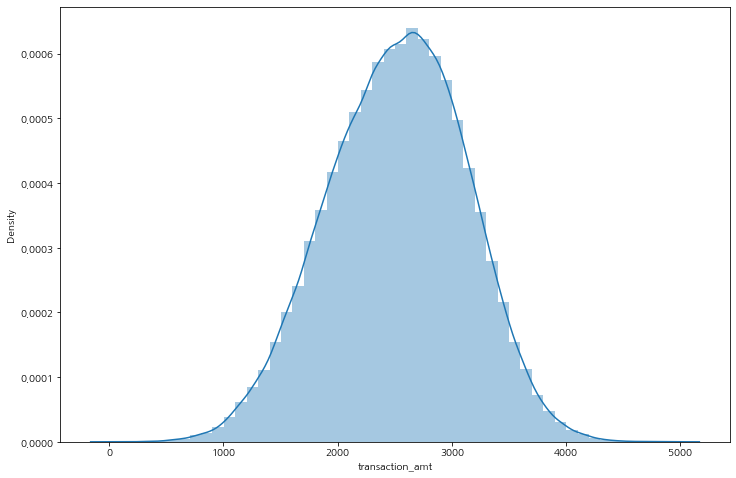

In [20]:
plt.figure(figsize=(12, 8))
sns.distplot(df['transaction_amt'])
plt.show()

In [21]:
df['transaction_amt_gp'] = np.where(df['transaction_amt'] <= 2000, 1, 
                                    np.where(df['transaction_amt'] <= 3000, 2, 3))
df[['transaction_amt', 'transaction_amt_gp']]

,transaction_amt,transaction_amt_gp
0,2167.0,2
1,2045.0,2
2,2892.0,2
3,3040.0,3
4,2976.0,2
...,...,...
149995,2890.0,2
149996,1875.0,1
149997,3371.0,3
149998,2306.0,2


In [22]:
df.groupby(['transaction_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()

,transaction_amt_gp,EVENT_LABEL,transaction_amt
0,1,fraud,353
1,1,legit,29420
2,2,fraud,4825
3,2,legit,79588
4,3,fraud,2826
5,3,legit,29988


In [23]:
# 평균 사기 5% -> 그룹 1, 2, 3 사기 비율이 다르다 : 거래 금액이 클수록 사기 거래 비율이 늘어난다
gp1_3 = df.groupby(['transaction_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()
print(f'gp 1 : {gp1_3.iloc[0, -1] / (gp1_3.iloc[0, -1] + gp1_3.iloc[1, -1])}')
print(f'gp 2 : {gp1_3.iloc[2, -1] / (gp1_3.iloc[2, -1] + gp1_3.iloc[3, -1])}')
print(f'gp 3 : {gp1_3.iloc[4, -1] / (gp1_3.iloc[4, -1] + gp1_3.iloc[5, -1])}')

gp 1 : 0.011856379941557787
gp 2 : 0.057159442266001684
gp 3 : 0.08612177729018101


- transaction_adj_amt 범주형으로

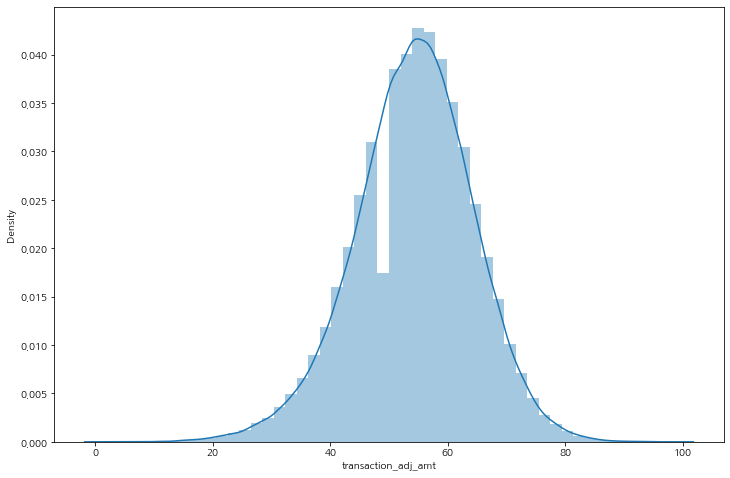

In [24]:
plt.figure(figsize=(12, 8))
sns.distplot(df['transaction_adj_amt'])
plt.show()

In [25]:
df['transaction_adj_amt_gp'] = np.where(df['transaction_adj_amt'] <= 30, 1, 
                                    np.where(df['transaction_adj_amt'] <= 60, 2, 3))
df[['transaction_adj_amt', 'transaction_adj_amt_gp']]

,transaction_adj_amt,transaction_adj_amt_gp
0,56.0,2
1,48.0,2
2,61.0,3
3,28.0,1
4,66.0,3
...,...,...
149995,57.0,2
149996,61.0,3
149997,48.0,2
149998,59.0,2


In [26]:
df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()

,transaction_adj_amt_gp,EVENT_LABEL,transaction_amt
0,1,fraud,1699
1,1,legit,645
2,2,fraud,6060
3,2,legit,99821
4,3,fraud,245
5,3,legit,38530


In [27]:
# 평균 사기 5% -> 그룹 1, 2, 3 사기 비율이 다르다 : 거래 조정 금액이 작을 수록 사기 거래 비율이 늘어난다
gp1_3 = df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()
print(f'gp 1 : {gp1_3.iloc[0, -1] / (gp1_3.iloc[0, -1] + gp1_3.iloc[1, -1])}')
print(f'gp 2 : {gp1_3.iloc[2, -1] / (gp1_3.iloc[2, -1] + gp1_3.iloc[3, -1])}')
print(f'gp 3 : {gp1_3.iloc[4, -1] / (gp1_3.iloc[4, -1] + gp1_3.iloc[5, -1])}')

gp 1 : 0.7248293515358362
gp 2 : 0.057234064657492846
gp 3 : 0.006318504190844616


- historic_velocity

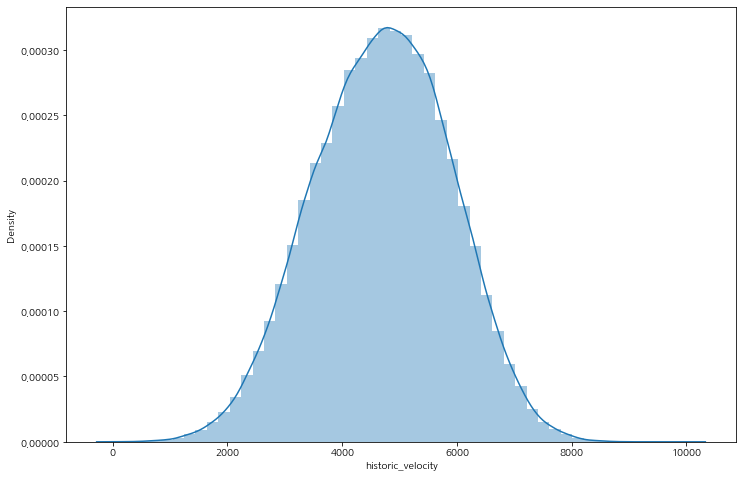

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(df['historic_velocity'])
plt.show()

In [29]:
df['historic_velocity_gp'] = np.where(df['historic_velocity'] <= 4000, 1, 
                                    np.where(df['historic_velocity'] <= 6000, 2, 3))
df[['historic_velocity', 'historic_velocity_gp']]

,historic_velocity,historic_velocity_gp
0,2572.0,1
1,4517.0,2
2,5007.0,2
3,6022.0,3
4,2600.0,1
...,...,...
149995,4544.0,2
149996,4369.0,2
149997,5135.0,2
149998,4846.0,2


In [30]:
df.groupby(['historic_velocity_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()

,historic_velocity_gp,EVENT_LABEL,transaction_amt
0,1,fraud,2287
1,1,legit,39361
2,2,fraud,4556
3,2,legit,80042
4,3,fraud,1161
5,3,legit,19593


In [31]:
# 평균 사기 5% -> 과거 거래 금액은 모두 비슷한 비율을 보이는 것으로 보아, 유의미한 데이터로 보기 힘들다.
gp1_3 = df.groupby(['historic_velocity_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()
print(f'gp 1 : {gp1_3.iloc[0, -1] / (gp1_3.iloc[0, -1] + gp1_3.iloc[1, -1])}')
print(f'gp 2 : {gp1_3.iloc[2, -1] / (gp1_3.iloc[2, -1] + gp1_3.iloc[3, -1])}')
print(f'gp 3 : {gp1_3.iloc[4, -1] / (gp1_3.iloc[4, -1] + gp1_3.iloc[5, -1])}')

gp 1 : 0.05491260084517864
gp 2 : 0.05385470105676257
gp 3 : 0.055941023417172595


### 범주형 변수(categorical) 탐색

In [32]:
df[categorical_lists].head()

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,EVENT_LABEL
0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,California,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,legit
1,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,Florida,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,legit
2,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,Utah,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,legit
3,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,Virginia,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,legit
4,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,South Carolina,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,legit


<Figure size 1440x576 with 0 Axes>

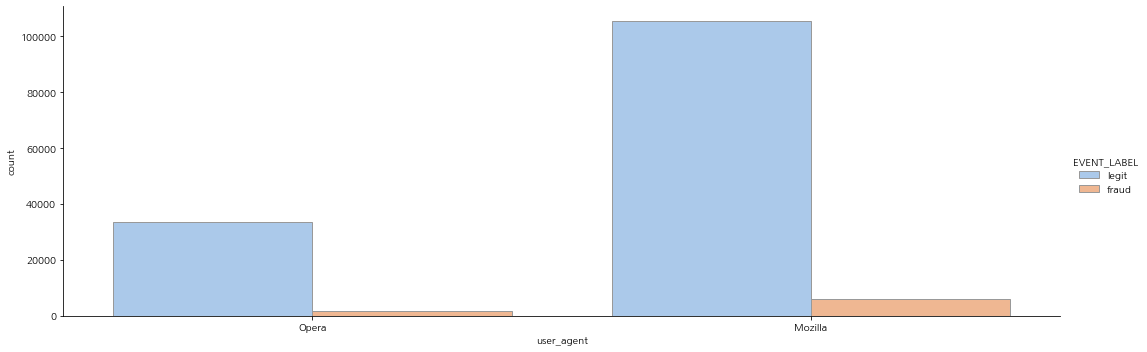

In [33]:
plt.figure(figsize=(20, 8))
sns.catplot(data=df, x='user_agent', hue='EVENT_LABEL', kind='count', palette='pastel', edgecolor='.6' , aspect=3)
plt.show()

In [34]:
cat_val = 'user_agent'

df_cat_val = df.groupby([cat_val, 'EVENT_LABEL'], as_index=False)['EVENT_TIMESTAMP'].count()

pivot_cat_val = pd.pivot_table(df_cat_val, index=cat_val, columns='EVENT_LABEL', values='EVENT_TIMESTAMP').reset_index()
pivot_cat_val.columns.names=['']

pivot_cat_val['ratio'] = round((pivot_cat_val.iloc[:, 1] / (pivot_cat_val.iloc[:, 1] + pivot_cat_val.iloc[:, 2])) * 100, 1)
pivot_cat_val

,user_agent,fraud,legit,ratio
0,Mozilla,6121,105492,5.5
1,Opera,1883,33504,5.3


In [35]:
def get_category_ratio(cat_val):
    df_cat_val = df.groupby([cat_val, 'EVENT_LABEL'], as_index=False)['EVENT_TIMESTAMP'].count()

    pivot_cat_val = pd.pivot_table(df_cat_val, index=cat_val, columns='EVENT_LABEL', values='EVENT_TIMESTAMP').reset_index()
    pivot_cat_val.columns.names=['']

    pivot_cat_val['ratio'] = round((pivot_cat_val.iloc[:, 1] / (pivot_cat_val.iloc[:, 1] + pivot_cat_val.iloc[:, 2])) * 100, 1)
    pivot_cat_val.sort_values(by='ratio', ascending=False, inplace=True)
    
    return pivot_cat_val

In [36]:
categorical_lists

['ip_address',
 'user_agent',
 'email_domain',
 'phone_number',
 'billing_city',
 'billing_state',
 'currency',
 'cvv',
 'signature_image',
 'transaction_type',
 'transaction_env',
 'EVENT_TIMESTAMP',
 'applicant_name',
 'billing_address',
 'merchant_id',
 'locale',
 'tranaction_initiate',
 'EVENT_LABEL']

- category별로 확인

In [37]:
col_idx = 'currency'

get_category_ratio(col_idx)

,currency,fraud,legit,ratio
1,eur,443,3863,10.3
2,usd,1887,29264,6.1
0,cad,5674,105869,5.1


<Figure size 1440x576 with 0 Axes>

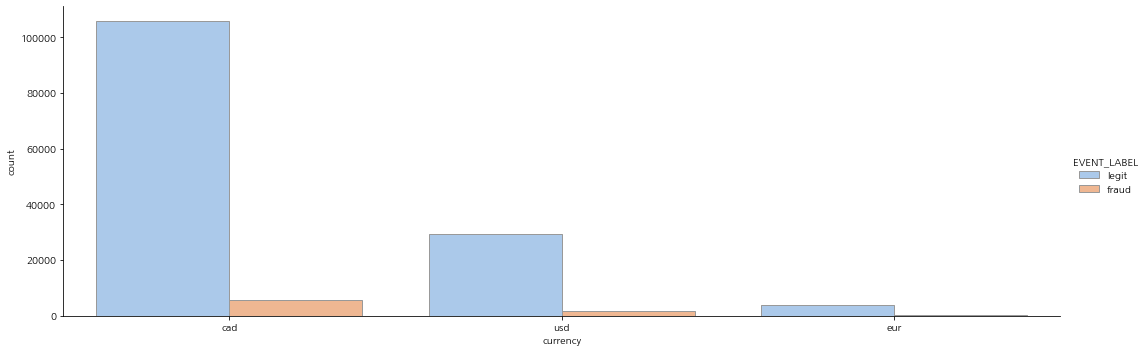

In [38]:
plt.figure(figsize=(20, 8))
sns.catplot(data=df, x=col_idx, hue='EVENT_LABEL', kind='count', palette='pastel', edgecolor='.6' , aspect=3)
plt.show()

# 모델링

In [65]:
from lightgbm import LGBMClassifier as LGBM
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

- 데이터 분리

In [39]:
# label data 수치형으로 변환 후 데이터 분리
df['EVENT_LABEL'] = np.where(df['EVENT_LABEL']=='fraud', 1, 0)
df['EVENT_LABEL'].value_counts()

0    138996
1      8004
Name: EVENT_LABEL, dtype: int64

In [49]:
X = df.drop(['EVENT_TIMESTAMP', 'EVENT_LABEL', 'transaction_amt_gp'], axis=1)
Y = df['EVENT_LABEL']

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((110250, 26), (110250,), (36750, 26), (36750,))

- labelencoder

In [50]:
# ▶ 사용하지 않을 카테고리형 변수는 리스트에서 제외
categorical_lists.remove('EVENT_LABEL')
categorical_lists.remove('EVENT_TIMESTAMP')

In [51]:
for col in categorical_lists:
    le = LabelEncoder()
    le.fit(list(train_x[col]) + list(test_x[col]))
    train_x[col] = le.transform(train_x[col])
    test_x[col] = le.transform(test_x[col])

In [52]:
train_x[categorical_lists].head()

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,locale,tranaction_initiate
26041,8869,0,6697,10630,3841,8,0,23,22,13,3,44612,115722,95289,246,14
143340,13004,0,1967,7271,7536,35,0,6,2,20,23,33507,98170,97240,7,22
91503,2221,1,2379,7705,528,17,2,5,20,3,2,85425,142227,35277,212,16
20211,10959,0,760,3028,751,39,0,7,8,8,14,81595,1601,19165,288,10
86804,12433,0,6719,639,1805,8,0,2,20,20,5,79401,46815,133312,226,10


In [53]:
test_x[categorical_lists].head()

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,applicant_name,billing_address,merchant_id,locale,tranaction_initiate
11516,8769,0,4294,8238,6272,6,0,8,5,6,20,59967,20116,31820,207,16
34955,12509,0,334,4409,2439,12,2,6,20,8,13,65196,126196,68500,280,25
48438,3288,0,801,6567,3686,31,2,17,22,2,6,49199,130520,96730,284,14
54546,5926,1,2326,4879,5137,8,0,22,13,8,8,74581,115995,14143,64,10
46353,512,0,1501,9612,6366,46,0,25,23,5,23,83778,10134,107075,260,25


- 하이퍼 파라미터 튜닝

In [58]:
model_param_dict = {}
rfc_param_grid = ParameterGrid({
                                'max_depth':[3, 5, 10, 15, 30, 50],
                                'n_estimators':[100, 200, 400, 800],
                                'random_state':[29, 1000],
                                'n_jobs':[-1]
})
lgbm_param_grid = ParameterGrid({
                                'max_depth':[3, 5, 10, 15, 30, 50],
                                'n_estimators':[100, 200, 400, 800],
                                'learning_rate':[0.05, 0.1, 0.2]
})

model_param_dict[RFC] = rfc_param_grid
model_param_dict[LGBM] = lgbm_param_grid

In [60]:
max_iter = 0

for m in model_param_dict.keys():
    for p in model_param_dict[m]:
        max_iter += 1

print(max_iter)

120


- 학습 및 모델 선정

In [61]:
best_score = -1
num_iter = 0

for m in model_param_dict.keys():
    for p in model_param_dict[m]:
        model = m(**p).fit(train_x.values, train_y.values)
        pred = model.predict(test_x.values)
        score = f1_score(test_y.values, pred)

        if score > best_score:
            best_score = score
            best_model = m
            best_param = p
        
        num_iter += 1

        print(f'iter : {num_iter}/{max_iter} | best score : {best_score:.3f}')

iter : 1/120 | best score : 0.235
iter : 2/120 | best score : 0.315
iter : 3/120 | best score : 0.315
iter : 4/120 | best score : 0.318
iter : 5/120 | best score : 0.318
iter : 6/120 | best score : 0.318
iter : 7/120 | best score : 0.318
iter : 8/120 | best score : 0.318
iter : 9/120 | best score : 0.334
iter : 10/120 | best score : 0.336
iter : 11/120 | best score : 0.340
iter : 12/120 | best score : 0.340
iter : 13/120 | best score : 0.340
iter : 14/120 | best score : 0.340
iter : 15/120 | best score : 0.340
iter : 16/120 | best score : 0.340
iter : 17/120 | best score : 0.574
iter : 18/120 | best score : 0.577
iter : 19/120 | best score : 0.577
iter : 20/120 | best score : 0.580
iter : 21/120 | best score : 0.580
iter : 22/120 | best score : 0.580
iter : 23/120 | best score : 0.580
iter : 24/120 | best score : 0.580
iter : 25/120 | best score : 0.659
iter : 26/120 | best score : 0.663
iter : 27/120 | best score : 0.663
iter : 28/120 | best score : 0.663
iter : 29/120 | best score : 

- 최종 모델 선정 및 평가

In [62]:
best_model

lightgbm.sklearn.LGBMClassifier

In [63]:
best_param

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 800}

In [64]:
model = best_model(**best_param)
model.fit(train_x, train_y)

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6003, number of negative: 104247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3921
[LightGBM] [Info] Number of data points in the train set: 110250, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054449 -> initscore=-2.854504
[LightGBM] [Info] Start training from score -2.854504
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (n